<a href="https://colab.research.google.com/github/RodolfoPerna/portfolio/blob/master/Lego_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD DATA**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving sets.csv to sets.csv
Saving themes.csv to themes.csv


In [177]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


**READ DATA**

In [0]:
# Read data
themes = pd.read_csv('themes.csv')
sets = pd.read_csv('sets.csv')

**Data exploration and relantionship**

![alt text](https://drive.google.com/uc?id=1Ba-Cs7kJYxHxnZvJ72j6Vr9FXxbmbb_7)

In [0]:
themes = themes.rename(columns={'id': 'theme_id'})
sets = sets.merge(themes, on='theme_id')

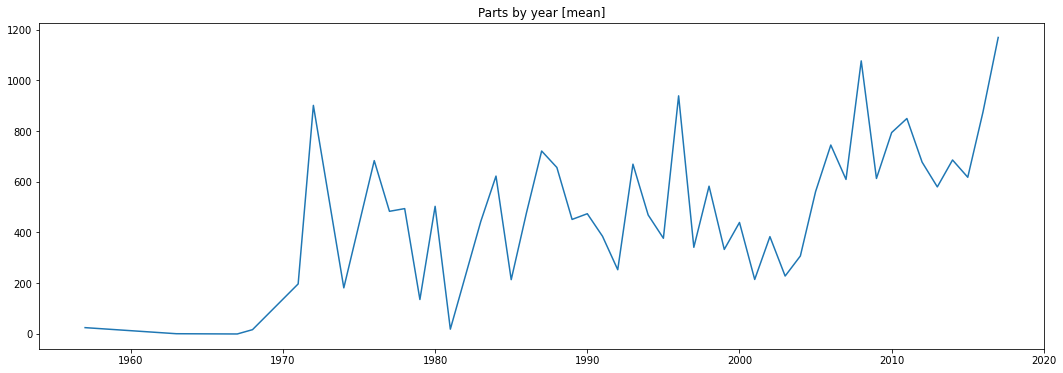

In [164]:
parts_by_year = sets[['year','num_parts']].groupby('year', as_index = True).mean()
plt.figure(figsize=(18,6)) #define the figure size
plt.title("Parts by year [mean]") #plot title
sns.lineplot(data=parts_by_year['num_parts']) #create line plot

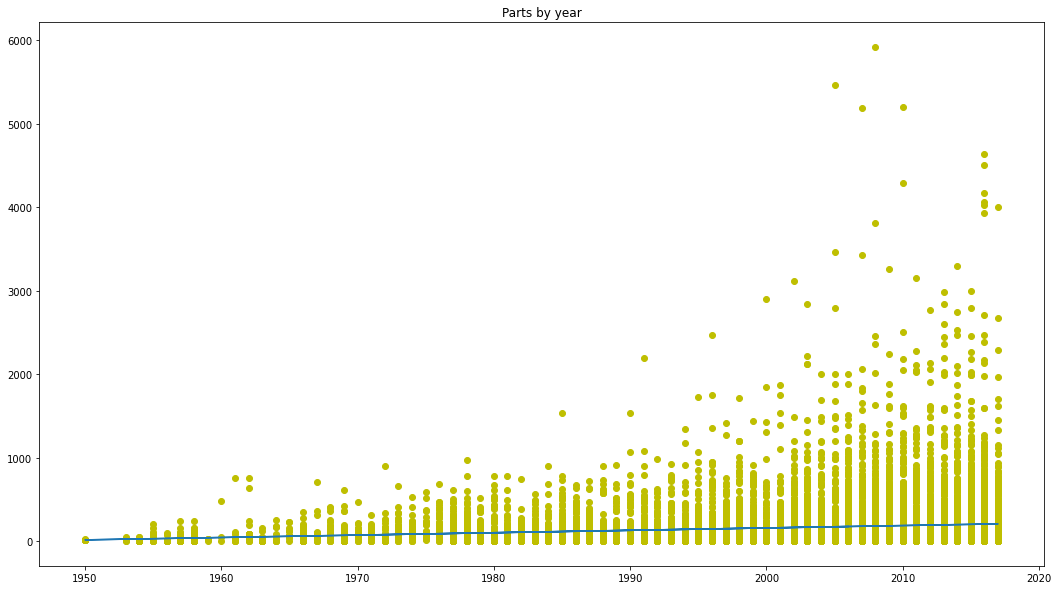

In [16]:
x = sets.year
y = sets.num_parts
m, b = np. polyfit(x, y, 1)
plt.figure(figsize=(18,10))
plt.title("Parts by year")
plt.plot(x, y, 'yo') # create scatter plot.
plt.plot(x, m*x + b) # add line of best fit.

In [167]:
sets[['name_y','num_parts']].groupby('name_y', as_index = True).mean().sort_values(by = 'num_parts', ascending = False).head(15)

,num_parts
name_y,
Sculptures,5922
Star Wars Episode 4/5/6,5461
Educational and Dacta,5200
Other,4640
Mosaic,4501
Building,4166
Disney,4060
Star Wars,4023
Modular Buildings,4009


In [0]:
#modular_buildings = sets.loc[sets.name_y == 'Modular Buildings']
#modular_buildings.sort_values(by = 'year', ascending = False)

modular_buildings = sets.loc[sets.name_y == 'Modular Buildings'].sort_values(by = 'year', ascending = False).head(10)

Text(0, 0.5, 'num_parts')

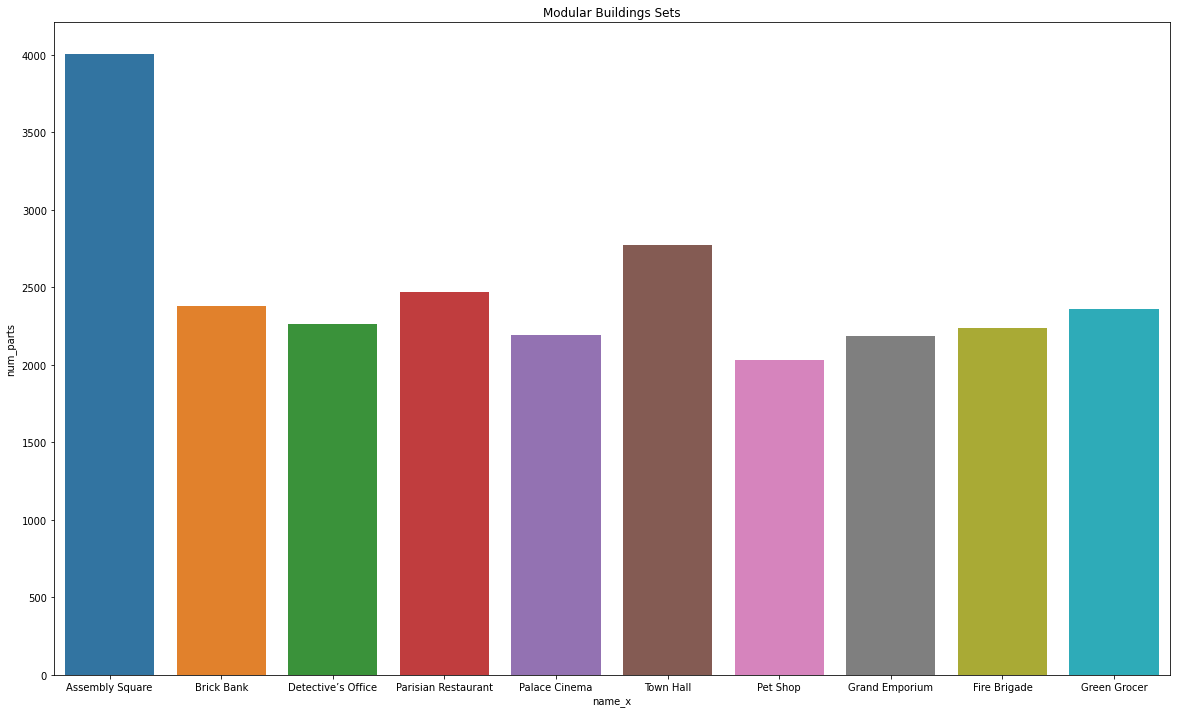

In [189]:
plt.figure(figsize=(20,12))
plt.title("Modular Buildings Sets")
sns.barplot(x=modular_buildings['name_x'], y=modular_buildings['num_parts'])
plt.ylabel("num_parts")

In [0]:
mosaic_buildings = sets.loc[sets.name_y == 'Mosaic'].sort_values(by = 'year', ascending = False).head(10)

Text(0, 0.5, 'num_parts')

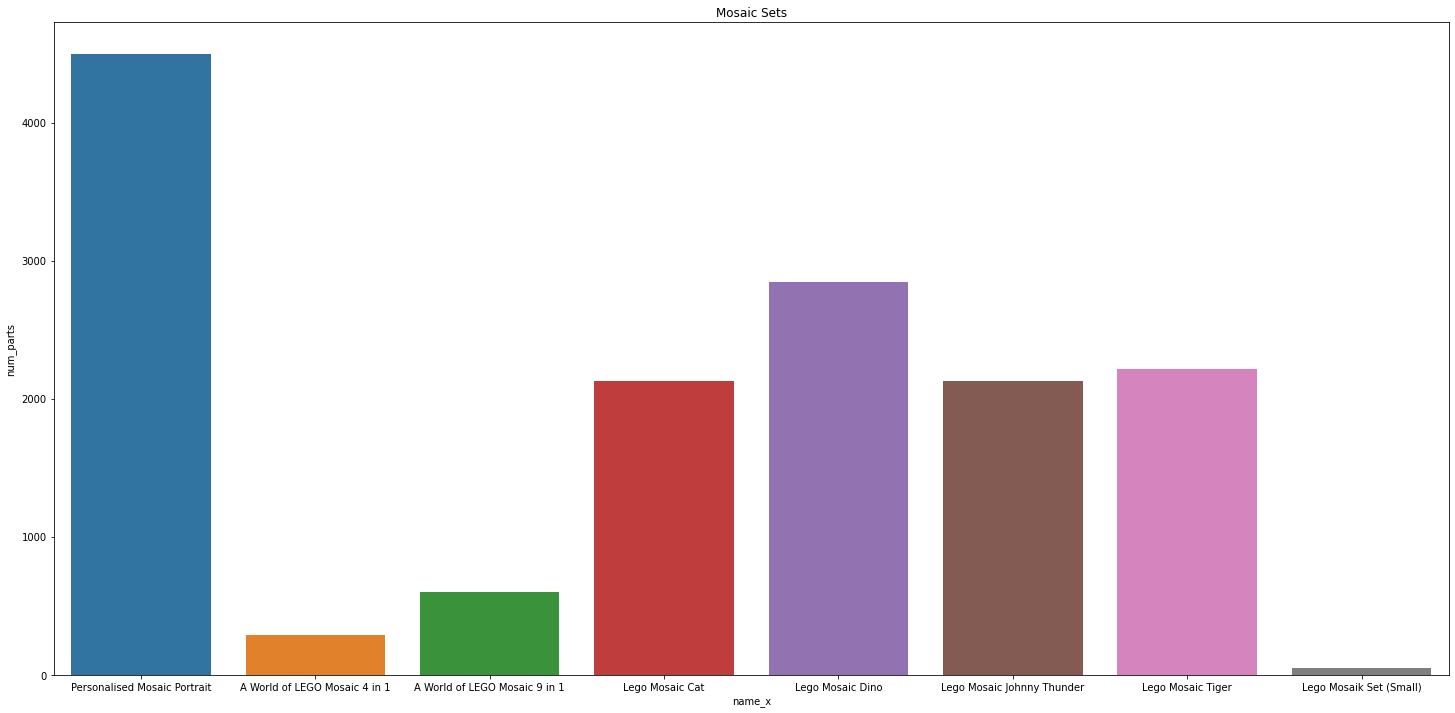

In [192]:
plt.figure(figsize=(25,12))
plt.title("Mosaic Sets")
sns.barplot(x=mosaic_buildings['name_x'], y=mosaic_buildings['num_parts'])
plt.ylabel("num_parts")

In [0]:
sculpture_buildings = sets.loc[sets.name_y == 'Sculptures'].sort_values(by = 'num_parts', ascending = False).head(10)

Text(0, 0.5, 'num_parts')

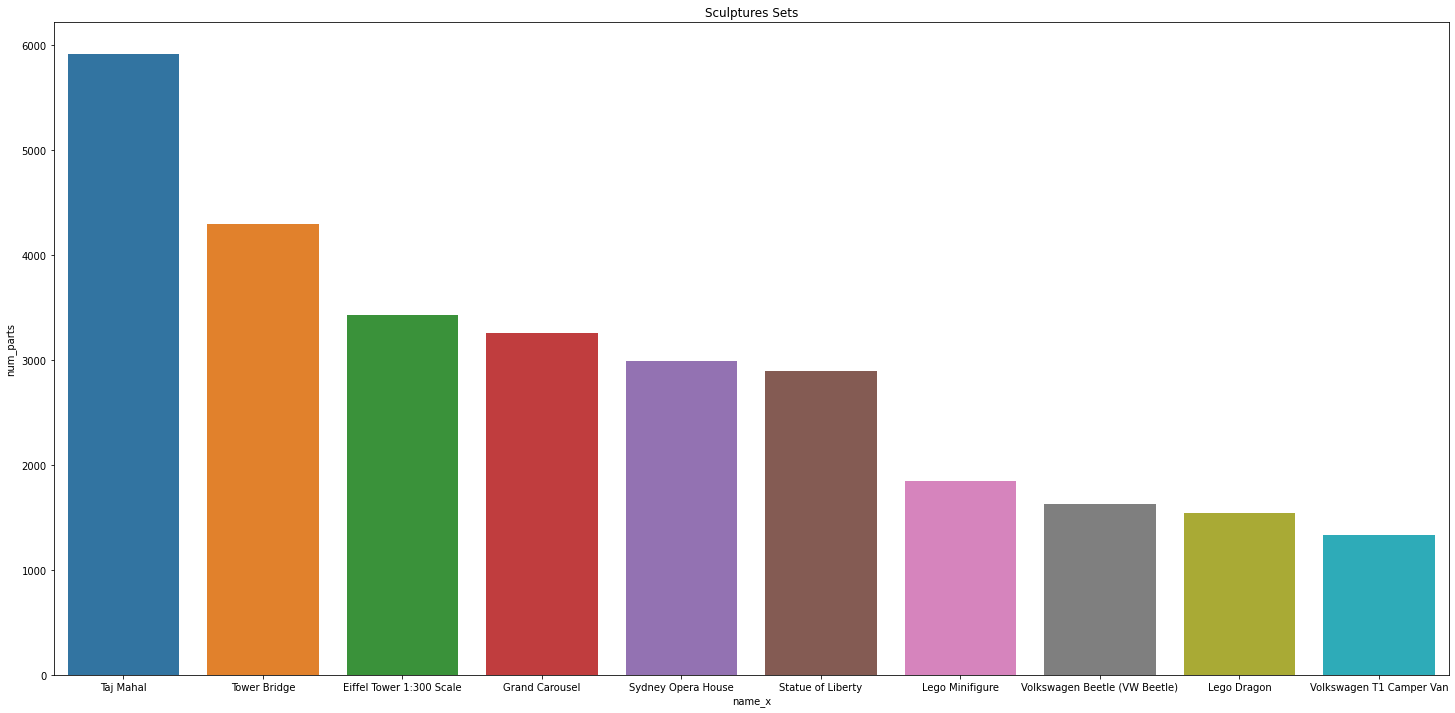

In [194]:
plt.figure(figsize=(25,12))
plt.title("Sculptures Sets")
sns.barplot(x=sculpture_buildings['name_x'], y=sculpture_buildings['num_parts'])
plt.ylabel("num_parts")

In [195]:
sets.loc[sets['num_parts'] == sets.groupby('name_y')['num_parts'].transform('max')].sort_values(by = 'num_parts', ascending = False).head(15)

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id
730,10189-1,Taj Mahal,2008,276,5922,Sculptures,NaN
1225,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461,Star Wars Episode 4/5/6,158.0
3100,2000409-1,Window Exploration Bag,2010,507,5200,Educational and Dacta,NaN
1393,75827-1,Firehouse Headquarters,2016,301,4640,Other,NaN
9026,40179-1,Personalised Mosaic Portrait,2016,277,4501,Mosaic,276.0
2093,10253-1,Big Ben,2016,43,4166,Building,38.0
10749,71040-1,The Disney Castle,2016,608,4060,Disney,NaN
545,75159-1,Death Star,2016,158,4023,Star Wars,NaN
1479,10255-1,Assembly Square,2017,155,4009,Modular Buildings,NaN
9249,42055-1,Bucket Wheel Excavator,2016,7,3928,Construction,5.0
